In [1]:
from google.cloud import bigquery
import pandas as pd

# Specify the path to the service account JSON file
service_account_json = "C:\\Users\\GalipŞahin\\Desktop\\Kişisel\\Dream\\galipsahin15.json"

# Create a BigQuery client
client = bigquery.Client.from_service_account_json(service_account_json)

# Create a query
query = """
SELECT * FROM `casedreamgames.Analytics.dataset_revenue`
"""

# Execute the query and load the results into a pandas DataFrame
df_revenue = client.query(query).to_dataframe()

# Display the first few rows
print(df_revenue.head())


                        event_time   package_type revenue          user_id  \
0 2021-05-29 12:52:43.674000+00:00  awesome_packs       2  hft3149978724rm   
1 2021-05-29 07:17:17.171000+00:00  awesome_packs       2  hft3149978724rm   
2 2021-06-11 13:26:57.290000+00:00  awesome_packs       2  hft3150675758rm   
3 2021-05-30 14:20:30.783000+00:00  awesome_packs       2  hft3150675758rm   
4 2021-05-31 12:52:42.914000+00:00  awesome_packs       2  hft3150675758rm   

  platform  
0  android  
1  android  
2      ios  
3      ios  
4      ios  


Number of rows fetched: 64952


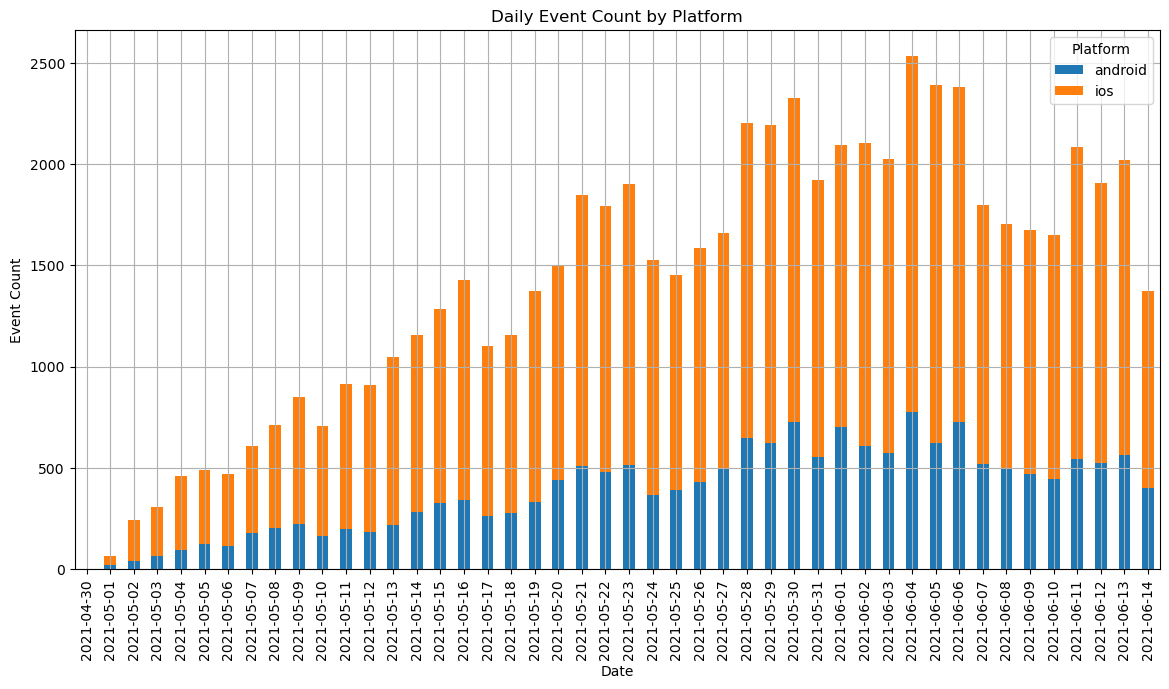

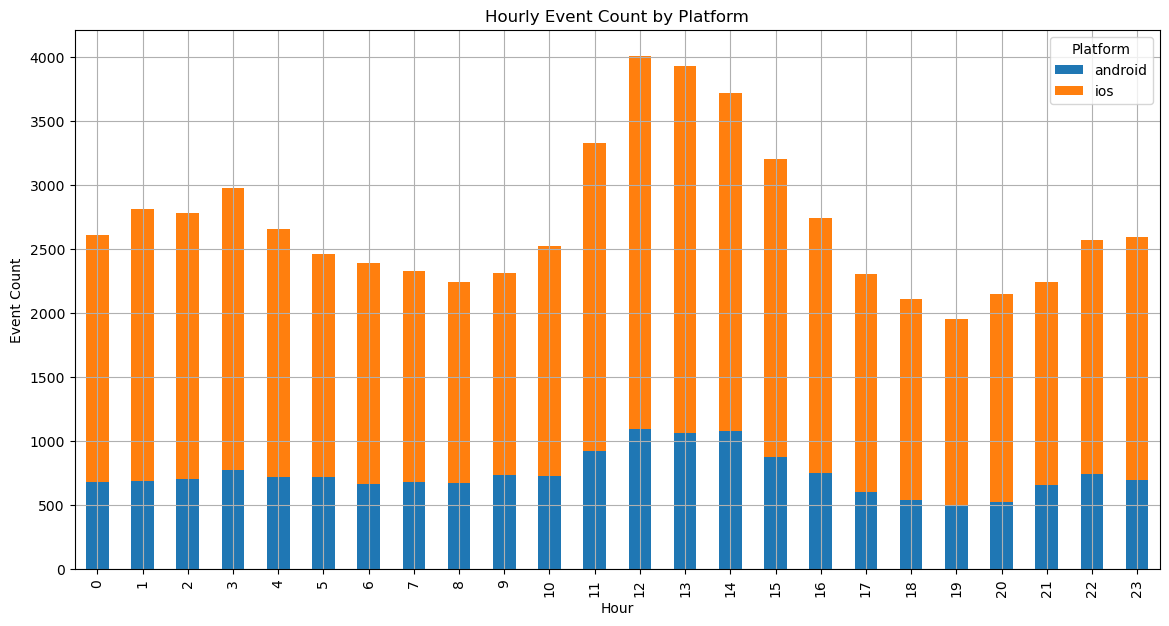

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Print the number of rows after fetching the data
print(f"Number of rows fetched: {df_revenue.shape[0]}")

# Convert event_time to datetime format
df_revenue['event_time'] = pd.to_datetime(df_revenue['event_time'])

# Calculate daily total revenue by platform
daily_revenue_by_platform = df_revenue.groupby([df_revenue['event_time'].dt.date, 'platform']).size().unstack().fillna(0)

# 1. Time Series Plot: Daily event count by platform
daily_revenue_by_platform.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Daily Event Count by Platform')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.grid(True)
plt.legend(title='Platform')
plt.show()

# Calculate hourly event count by platform
hourly_revenue_by_platform = df_revenue.groupby([df_revenue['event_time'].dt.hour, 'platform']).size().unstack().fillna(0)

# 2. Time Series Plot: Hourly event count by platform
hourly_revenue_by_platform.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Hourly Event Count by Platform')
plt.xlabel('Hour')
plt.ylabel('Event Count')
plt.grid(True)
plt.legend(title='Platform')
plt.show()


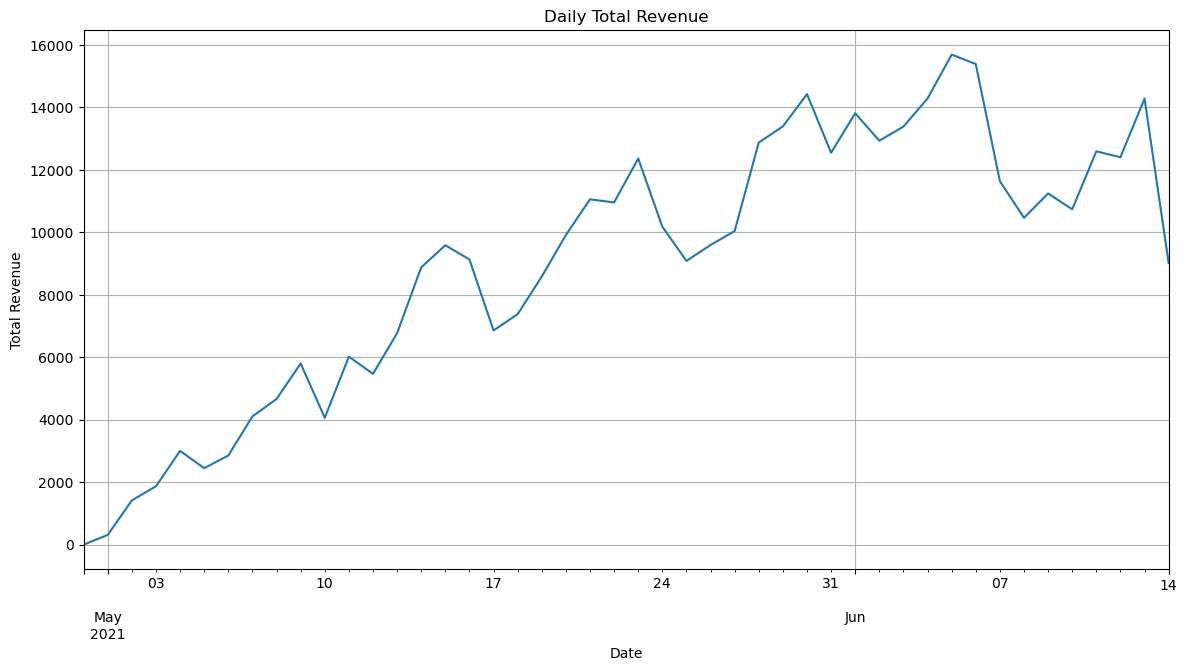

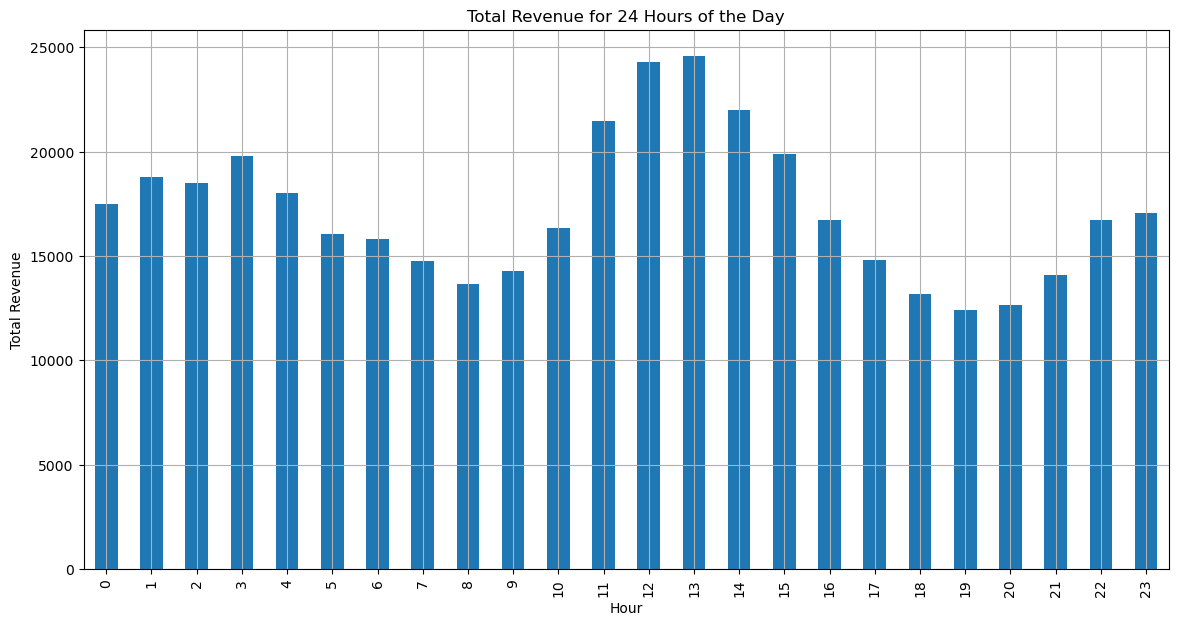

In [4]:
# Convert event_time to datetime format
df_revenue['event_time'] = pd.to_datetime(df_revenue['event_time'])

# Ensure the revenue column is numeric
df_revenue['revenue'] = pd.to_numeric(df_revenue['revenue'], errors='coerce')

# Calculate daily total revenue
daily_revenue = df_revenue.resample('D', on='event_time')['revenue'].sum()

# Plot daily total revenue
plt.figure(figsize=(14, 7))
daily_revenue.plot()
plt.title('Daily Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Calculate hourly total revenue (for 24 hours of the day)
df_revenue['hour'] = df_revenue['event_time'].dt.hour
hourly_revenue = df_revenue.groupby('hour')['revenue'].sum()

# Plot hourly total revenue (for 24 hours of the day)
plt.figure(figsize=(14, 7))
hourly_revenue.plot(kind='bar')
plt.title('Total Revenue for 24 Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(range(24))  # Show hour labels from 0 to 23
plt.show()


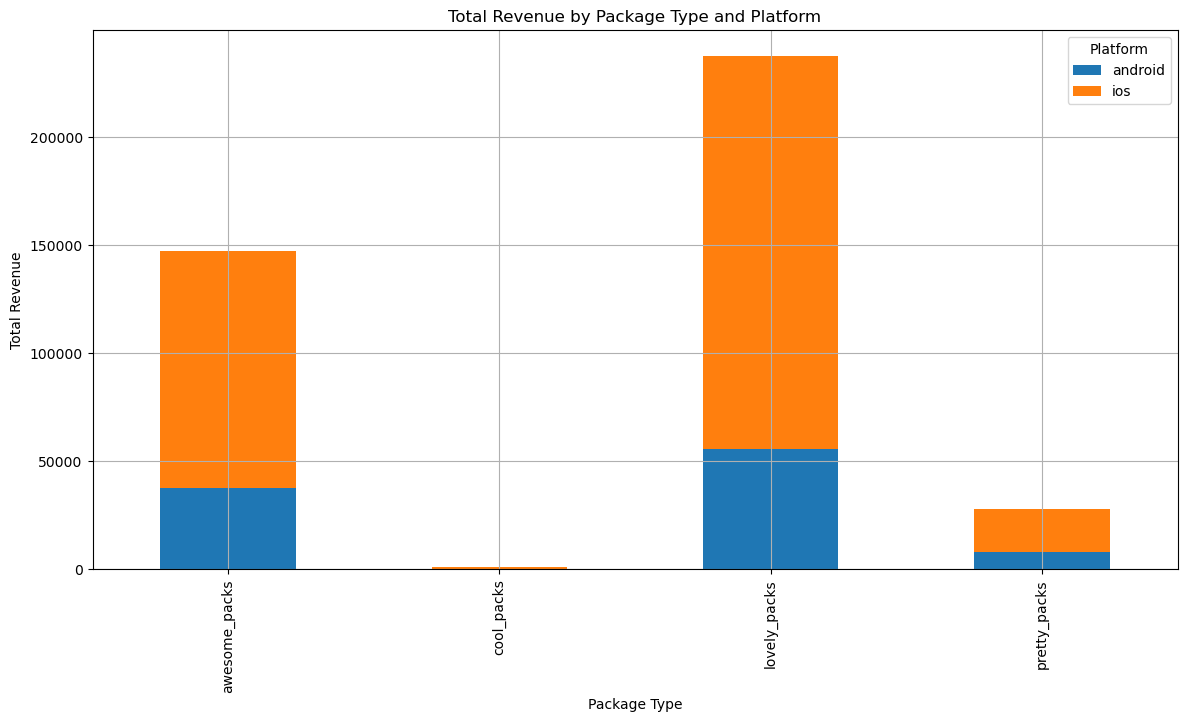

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the revenue column is numeric
df_revenue['revenue'] = pd.to_numeric(df_revenue['revenue'], errors='coerce')

# Calculate total revenues by package type and platform
revenue_by_package_platform = df_revenue.groupby(['package_type', 'platform'])['revenue'].sum().unstack()

# Plot total revenues by package type and platform as a bar chart
revenue_by_package_platform.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Total Revenue by Package Type and Platform')
plt.xlabel('Package Type')
plt.ylabel('Total Revenue')
plt.legend(title='Platform')
plt.grid(True)
plt.show()


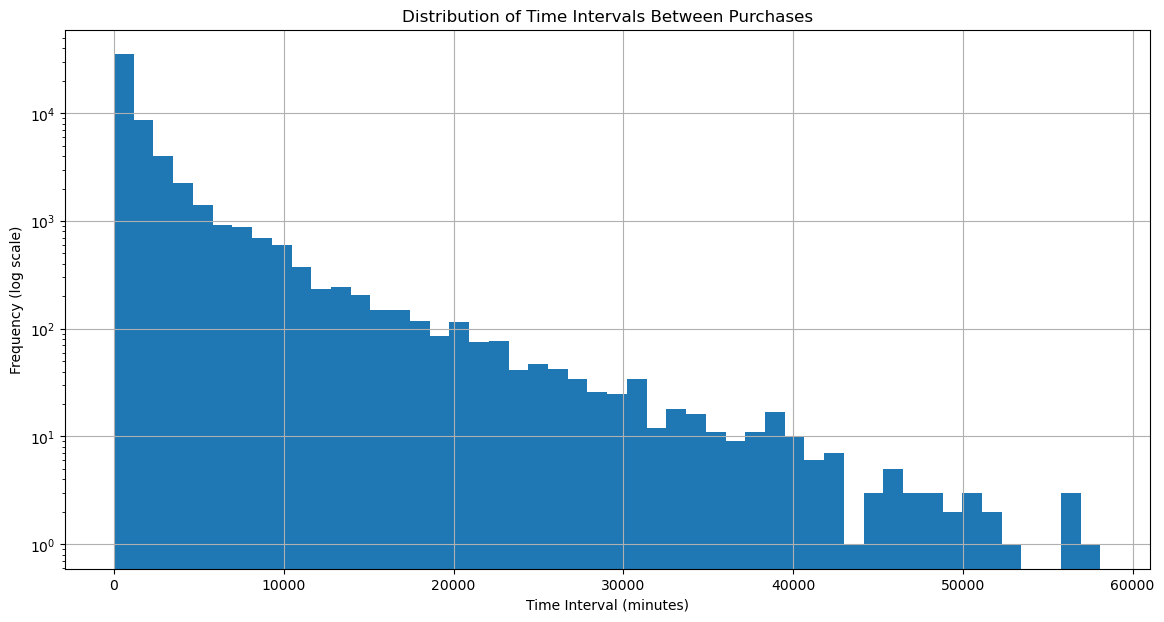

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the event_time column is in datetime format
df_revenue['event_time'] = pd.to_datetime(df_revenue['event_time'])

# Sort the dataset by user_id and event_time
df_revenue = df_revenue.sort_values(by=['user_id', 'event_time'])

# Calculate the time differences between consecutive purchases for each user in minutes
df_revenue['time_diff'] = df_revenue.groupby('user_id')['event_time'].diff().dt.total_seconds() / 60

# Drop NA values resulting from the diff calculation
time_diffs = df_revenue['time_diff'].dropna()

# Plot the distribution of time differences
plt.figure(figsize=(14, 7))
plt.hist(time_diffs, bins=50, log=True)
plt.title('Distribution of Time Intervals Between Purchases')
plt.xlabel('Time Interval (minutes)')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()


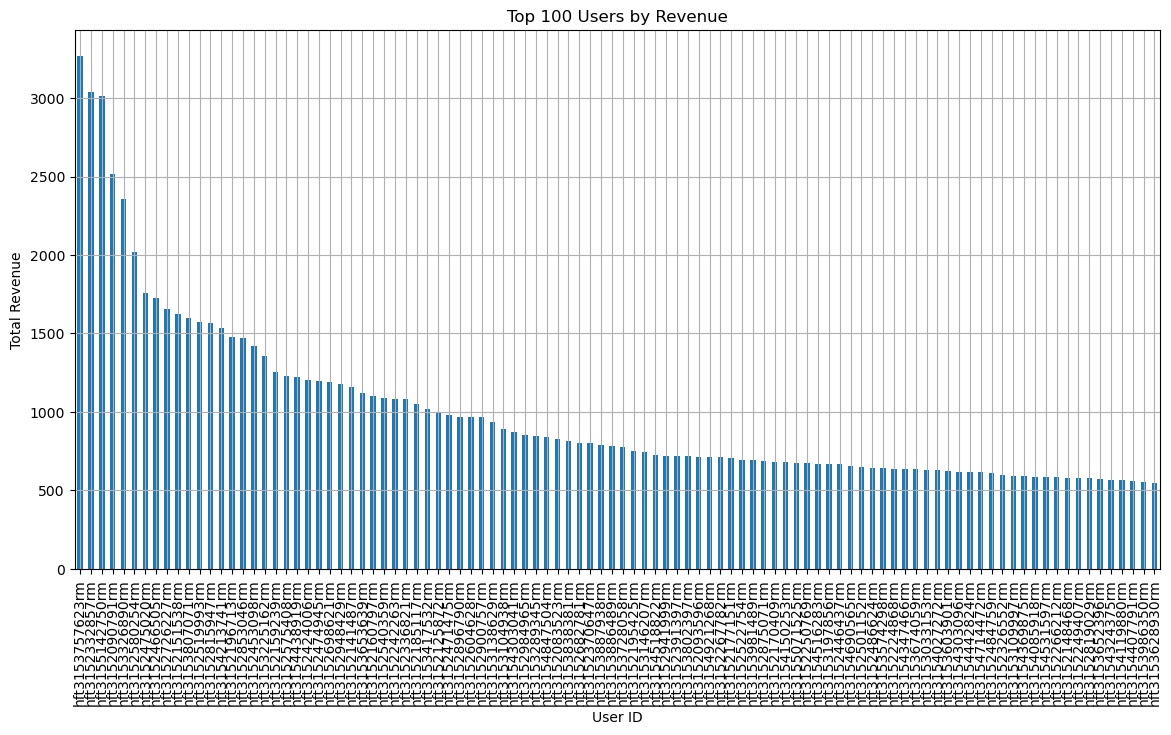

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the revenue column is numeric
df_revenue['revenue'] = pd.to_numeric(df_revenue['revenue'], errors='coerce')

# Calculate the total revenue for each user
total_revenue_per_user = df_revenue.groupby('user_id')['revenue'].sum()

# Select the top 100 users who generate the most revenue
top_100_users = total_revenue_per_user.nlargest(100)

# Plot the total revenue generated by each user as a bar chart
plt.figure(figsize=(14, 7))
top_100_users.plot(kind='bar')
plt.title('Top 100 Users by Revenue')
plt.xlabel('User ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the revenue column is numeric
df_revenue['revenue'] = pd.to_numeric(df_revenue['revenue'], errors='coerce')

# Calculate the total revenue for each user
total_revenue_per_user = df_revenue.groupby('user_id')['revenue'].sum()

# Calculate the average revenue per user
average_revenue_per_user = total_revenue_per_user.mean()

# Print the result
print(f"Average revenue per user: {average_revenue_per_user:.2f}")


Average revenue per user: 50.86
